# 데이터 불러오기

In [263]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

data_train = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')
print(data_train.shape)
data_train.head(5).transpose()

(1108, 22)


,0,1,2,3,4
id,0,1,2,3,4
Year_Birth,1974,1962,1951,1974,1946
Education,Master,Graduation,Graduation,Basic,PhD
Marital_Status,Together,Single,Married,Married,Together
Income,46014.0,76624.0,75903.0,18393.0,64014.0
Kidhome,1,0,0,1,2
Teenhome,1,1,1,0,1
Dt_Customer,21-01-2013,24-05-2014,08-04-2013,29-03-2014,10-06-2014
Recency,21,68,50,2,56
NumDealsPurchases,10,1,2,2,7


## feature 설명

- id : 샘플 아이디
- Year_Birth : 고객 생년월일
- Education : 고객 학력
- Marital_status : 고객 결혼 상태
- Income : 고객 연간 가구 소득
- Kidhome : 고객 가구의 자녀 수
- Teenhome : 고객 가구의 청소년 수
- Dt_Customer : 고객이 회사에 등록한 날짜
- Recency : 고객의 마지막 구매 이후 일수
- NumDealsPurchases : 할인된 구매 횟수
- NumWebPurchases : 회사 웹사이트를 통한 구매 건수
- NumCatalogPurchases : 카탈로그를 사용한 구매 수 
- NumStorePuchases : 매장에서 직접 구매한 횟수
- NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
- AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
- Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- target : 고객의 제품 총 소비량

### target overview

<AxesSubplot:xlabel='target', ylabel='Count'>

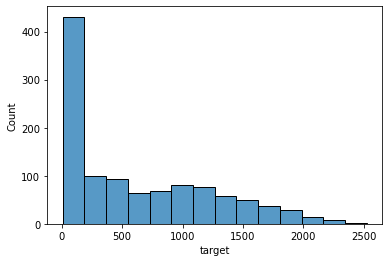

In [264]:
sns.histplot(data_train['target'])

In [265]:
data_train_T=data_train['target']
target=[]
for i in range(len(data_train_T)):
    if data_train_T.iloc[i] < 250:
        target.append(1)
    elif data_train_T.iloc[i] < 1000:
        target.append(2)
    elif data_train_T.iloc[i] < 1800:
        target.append(3)
    else:
        target.append(4)
        
data_train["Range"] = target

<AxesSubplot:xlabel='Range', ylabel='count'>

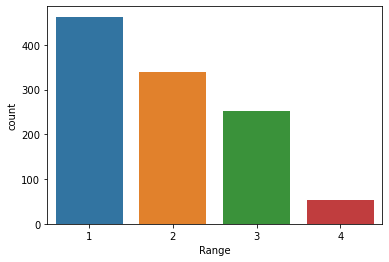

In [266]:
sns.countplot(x = data_train["Range"])

In [267]:
data_train[data_train['target']>2250].transpose()

,164,422,573,684,783,788
id,164,422,573,684,783,788
Year_Birth,1969,1977,1953,1947,1991,1949
Education,Graduation,2n Cycle,Graduation,Master,Master,PhD
Marital_Status,Together,Together,Together,Together,Single,Married
Income,76653.0,82326.0,94384.0,77632.0,90638.0,69098.0
Kidhome,0,0,0,0,0,0
Teenhome,0,0,0,0,0,0
Dt_Customer,16-08-2013,10-03-2014,04-03-2013,10-03-2013,13-02-2014,16-02-2013
Recency,91,30,62,73,29,82
NumDealsPurchases,1,1,0,1,1,1


target의 분포를 보니 0~250 사이의 데이터가 많으며, 2000 이후의 샘플에 대한 데이터가 충분하지 않아, hight target에 대해서 잘 맞추지 못하는 모습을 보입니다.

In [268]:
print(data_train.shape, data_test.shape)

(1108, 23) (1108, 21)


Data가 1100개 정도로 많은 편은 아닙니다. K-fold를 통한 학습이 필요해 보입니다.

In [269]:
data_train.describe()

,id,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Range
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,553.500000,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841,1.906137
std,319.996354,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972,0.910760
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,276.750000,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000,1.000000
50%,553.500000,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000,2.000000
75%,830.250000,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000,3.000000
max,1107.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,4.000000


# 데이터 전처리

저는 현재 간단하게만 전처리를 진행하였지만, 여기서 추가적으로 전처리를 진행하여 이상치를 제거해주거나, 새로운 feature를 생성하는 작업을 통해 성능을 더욱 높일 수 있습니다.

### Year_Birth를 이용해 나이 Age 계산하기

In [270]:
data_train['Age'] = 2022 - data_train['Year_Birth']
data_test['Age'] = 2022 - data_train['Year_Birth']

### 문자 자료형 Education, Marital_Status 숫자로 인코딩 하기

In [271]:
data_train['Education'].value_counts()

Graduation    570
PhD           254
Master        173
2n Cycle       89
Basic          22
Name: Education, dtype: int64

label encoding 사용하여 학사->석사->박사 순으로 인코딩
- 학사 = 0, Basic, Graduation
- 석사 = 1, 2n Cycle, Master
- 박사 = 2, PhD

In [272]:
#train set 및 test set에 적용
for data in [data_train, data_test]:
    for i in range(data.shape[0]):
        education = data['Education'].iloc[i]
        if education in ["Basic", "Graduation"]:
            data['Education'].iloc[i] = 0
        elif education in ["2n Cycle", "Master"]:
            data['Education'].iloc[i] = 1
        else:
            data['Education'].iloc[i] = 2

---

In [273]:
data_train['Marital_Status'].value_counts()

Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

one hot encoding 사용하여 결혼 / 싱글 두가지로 인코딩

- 결혼, 동거 = 0, Married, Together
- 싱글 = 1, Single, Divorced, Widow, Alone, YOLO, Absurd

In [274]:
#train set 및 test set에 적용
for data in [data_train, data_test]:
    for i in range(data.shape[0]):
        marital_status = data['Marital_Status'].iloc[i]
        if marital_status in ["Married", "Together"]:
            data['Marital_Status'].iloc[i] = 0
        else:
            data['Marital_Status'].iloc[i] = 1

### 타임스탬프 Dt_Customer를 회사 가입 개월수인 Sign_Month로 변환
sign_month = 사이트에 가입하고 몇개월이나 지났는가? 높을수록 예전에 가입한사람

In [277]:
for data in [data_train, data_test]:
    for i in range(data.shape[0]):
        data['Dt_Customer'].iloc[i] = int(data['Dt_Customer'].iloc[i][-1]) * 12 + int(data['Dt_Customer'].iloc[i][3:5])
        
recent_month = max(data_train['Dt_Customer'])

for data in [data_train, data_test]:
    month_arr = []
    for i in range(data.shape[0]):
        month_arr.append(recent_month - data['Dt_Customer'].iloc[i])
        
    data['Sign_Month'] = month_arr

### 상관관계 살펴보기
target과 feature의 상관관계를 살펴봅시다

In [278]:
corr_matrix = data_train.corr()
corr_matrix["target"].sort_values(ascending=False)

target                 1.000000
Range                  0.954404
NumCatalogPurchases    0.798065
Income                 0.784084
NumStorePurchases      0.677785
NumWebPurchases        0.546082
AcceptedCmp5           0.458208
AcceptedCmp            0.452538
AcceptedCmp1           0.361102
AcceptedCmp4           0.256784
Response               0.242760
Sign_Month             0.176342
Age                    0.136035
AcceptedCmp2           0.129995
Recency                0.050873
AcceptedCmp3           0.040736
id                     0.034192
Complain              -0.058704
NumDealsPurchases     -0.072802
Teenhome              -0.109214
Year_Birth            -0.136035
ChildHome             -0.471012
NumWebVisitsMonth     -0.488252
Kidhome               -0.538365
Name: target, dtype: float64

### 필요없는 feature 버리기

In [279]:
data_train = data_train.drop(["id", "Dt_Customer", "Year_Birth"], axis = 1)
data_test = data_test.drop(["id", "Dt_Customer", "Year_Birth"], axis = 1)

### 데이터셋 X, Y 나누기

In [280]:
data_train_X = data_train.drop(["target"], axis = 1)
data_train_y = data_train["target"]

# 모델 생성 및 학습하기

### 평가방법인 NMAE 정의

In [281]:
def NMAE(true, pred):
    score = np.mean(np.abs(true - pred) / true)
    return score

### catboost, lightgbm, xgboost를 10 k-fold로 soft-voting
여기서 추가적으로 하이퍼파라미터 튜닝 등을 통해 성능을 향상시키거나, ngbr 등 다른 모델을 추가하거나, soft-voting 대신 다른 앙상블 방법을 사용해서 모델의 성능을 향상시킬 수 있습니다.

저는 현재 이전에 사용했던 코드를 가져와서 하이퍼파라미터 튜닝을 시도하고, NN 모델을 사용해보고 있습니다.

In [282]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor


skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True) #총 10번의 fold 진행
n = 0 #x번째 fold인지 기록

fold_target_pred = []
fold_score = []

for train_index, valid_index in skf.split(data_train_X, data_train_X['Range']): #range 기준으로 stratified k fold 진행
    n += 1
    
    val_pred_name = [] #validation pred model 이름 저장
    val_pred = []      #validation set pred 결과 저장
    target_pred = []   #test set pred 결과 저장
    
    train_X = np.array(data_train_X.drop("Range", axis = 1)) #분배된 학습을 위해 생성한 Range feature 제거
    train_Y = np.array(data_train_y)
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]
    
    X_test = np.array(data_test)

    ### Create Model ###
    
    ###모델을 생성하고 집어넣으면 됩니다.
    
    ### LGBMRegressor ###
    model = LGBMRegressor(random_state = 42, verbose = 0) #추가적으로 하이퍼파라미터 튜닝 필요
    model.fit(X_train, y_train) # 모델 학습
    
    val_pred_name.append("LGBMRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### XGBRegressor ###
    model = XGBRegressor(random_state = 42) #추가적으로 하이퍼파라미터 튜닝 필요
    model.fit(X_train, y_train)
    
    val_pred_name.append("XGBRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### CatBoostRegressor ###
    model = CatBoostRegressor(random_state = 42) #추가적으로 하이퍼파라미터 튜닝 필요
    model.fit(X_train, y_train)
    
    val_pred_name.append("CatBoostRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### voting ###
    
    ### average validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    
    preds = preds/len(val_pred)
    
    ### average target pred ###
    target_preds = np.array(target_pred[0])
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    
    target_preds = target_preds/len(target_pred)
    
    fold_target_pred.append(target_preds) # append final target pred
    
    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model NMAE : %0.4f" %(val_pred_name[i], NMAE(y_valid, val_pred[i].astype(int))))
        
    print("==============================")
    print("Average NMAE %0.4f" %(NMAE(y_valid, preds.astype(int))))
    print("")
    
    fold_score.append(NMAE(y_valid, preds.astype(int)))

total_score = fold_score[0]
for i in range(2, len(fold_score), 1):
    total_score += fold_score[i]
total_score = total_score/(len(fold_score))    

print("==============================")
print("Total Average NMAE %0.4f" %(total_score)) #최종 average score 출력

========== fold 1 ==========
LGBMRegressor model NMAE : 0.2334
XGBRegressor model NMAE : 0.2296
CatBoostRegressor model NMAE : 0.2563
Average NMAE 0.2204

========== fold 2 ==========
LGBMRegressor model NMAE : 0.2238
XGBRegressor model NMAE : 0.2112
CatBoostRegressor model NMAE : 0.2240
Average NMAE 0.2100

========== fold 3 ==========
LGBMRegressor model NMAE : 0.1769
XGBRegressor model NMAE : 0.1307
CatBoostRegressor model NMAE : 0.2074
Average NMAE 0.1582

========== fold 4 ==========
LGBMRegressor model NMAE : 0.2202
XGBRegressor model NMAE : 0.2211
CatBoostRegressor model NMAE : 0.2487
Average NMAE 0.2146

========== fold 5 ==========
LGBMRegressor model NMAE : 0.2539
XGBRegressor model NMAE : 0.2173
CatBoostRegressor model NMAE : 0.2669
Average NMAE 0.2321

========== fold 6 ==========
LGBMRegressor model NMAE : 0.2067
XGBRegressor model NMAE : 0.1878
CatBoostRegressor model NMAE : 0.1934
Average NMAE 0.1824

========== fold 7 ==========
LGBMRegressor model NMAE : 0.2215
XGBRegr

# 제출하기

In [202]:
### average target pred ###
final_pred = np.array(fold_target_pred[0])
for i in range(1, len(fold_target_pred)):
    final_pred += fold_target_pred[i]

final_pred = final_pred/len(fold_target_pred)
final_pred = final_pred.astype(int)

In [203]:
submission = pd.read_csv("./sample_submission.csv")
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [204]:
submission['target'] = final_pred
submission.head()

,id,target
0,0,565
1,1,871
2,2,857
3,3,1177
4,4,1153


In [205]:
submission.to_csv("Submit_5.csv",index=False)